# **My task is to predict the charges**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('insurance.csv')


# **Exploratory Data Analysis** **bold text**

**Now we will start performing Exploratory Data Analysis**


First we will see the sample data using the head() and its shape

In [ ]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.shape

(1338, 7)

Check for the null values.

Only checking is the part of the EDA,and not the removal as that will be data cleaning

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looking at the data, I can say that there are no null values in any of the columns. Sex, smoker and region are of object data types, which is string.


Next step is to describe the data


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Visualization of the numeric columns

In [ ]:
numeric_columns = data[['age', 'bmi', 'children', 'charges']]


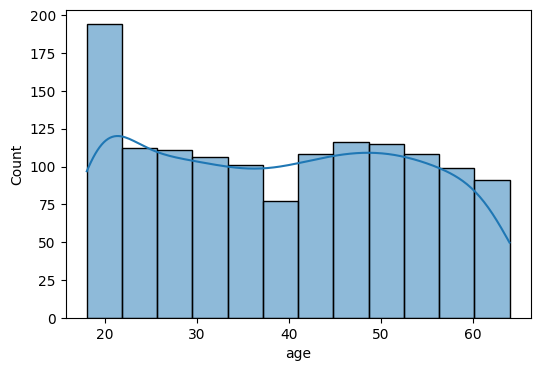

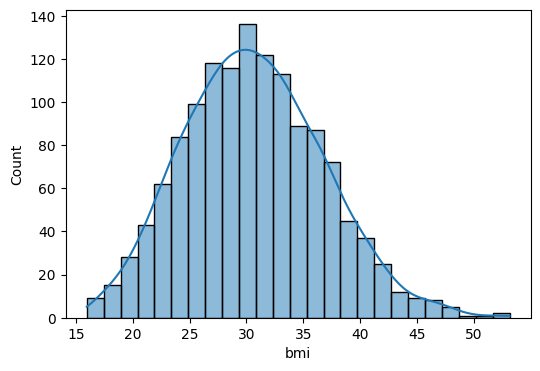

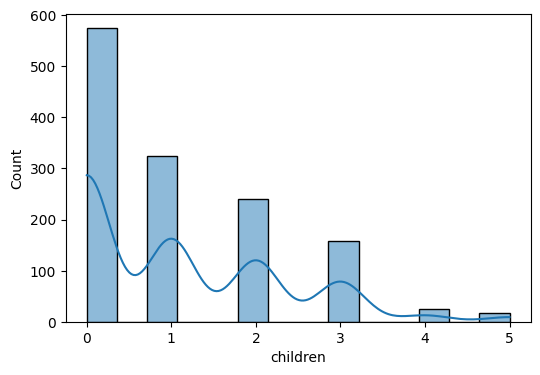

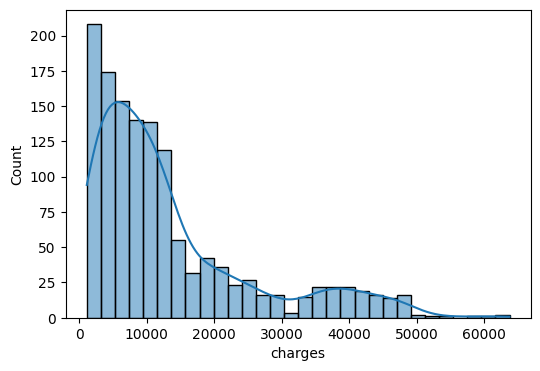

In [ ]:
for col in numeric_columns :
  plt.figure(figsize=(6,4))
  sns.histplot(data[col], kde = True);

Seeing the histograms from children and charges makes me think that there meay be a relation between the 2

Now, working on the categorical data, we will use the count plots

<Axes: xlabel='count', ylabel='sex'>

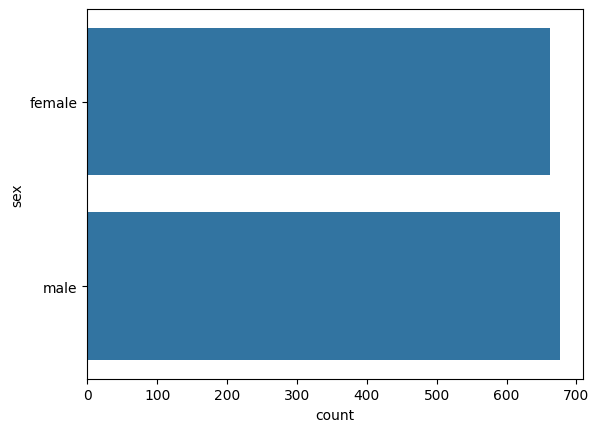

In [ ]:
sns.countplot(data=data, y = 'sex')

<Axes: xlabel='count', ylabel='smoker'>

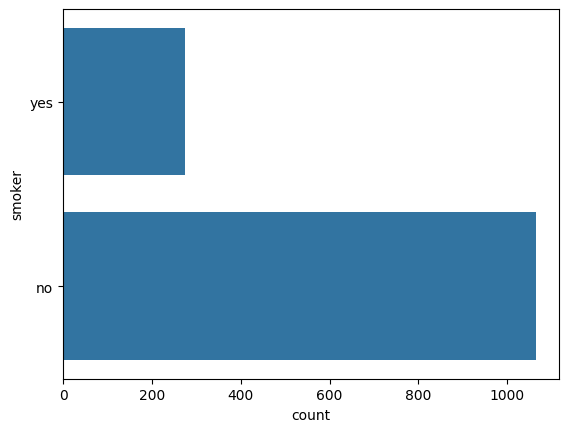

In [ ]:
sns.countplot(data=data, y = 'smoker')

<Axes: xlabel='count', ylabel='region'>

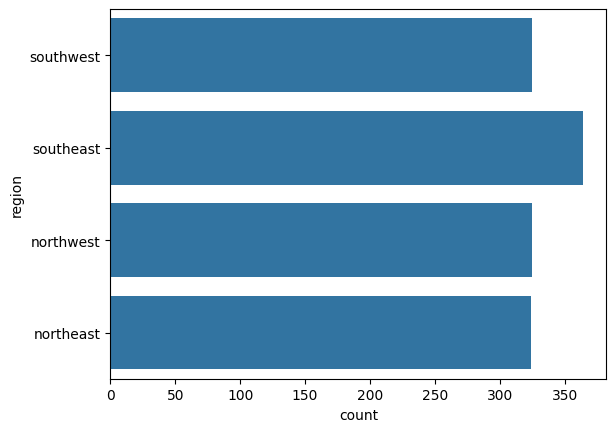

In [ ]:
sns.countplot(data=data, y = 'region')

Now, we will find the correlation in our data, which is done only for the numeric columns

This will tell us, which fields are more important

<Axes: >

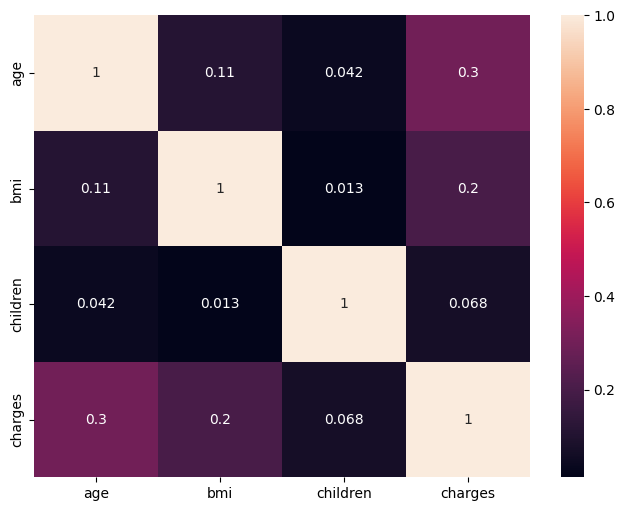

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True)

# **Data Cleaning and Preprocessing**

For this, first step is to check for null values and remove those rows of fill those cells with mean, median or mode etc.

Our data does not have any null values. Moving on to the next step which is removing duplicated

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(1337, 7)

In [ ]:
data.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


smoker, region and sex are object types, we always need numeric data to develop an ML model

In [ ]:
data['sex'].value_counts()

,count
sex,
male,675
female,662


i saw through the charts and also i can see that there are only 2 types of data i.e. "male", and "female" which could also have been "male", "m", "Male", "f", "Female" etc. in which case , we would have to clean it.

We will now encode the sex first into numeric format

In [ ]:
#encoding the data
data['sex'] = data['sex'].map({"male" : 0, "female" : 1})


In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [ ]:
#doing the same with smoker
data['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [ ]:
# no data cleaning is required as .value_counts() show only 2 variables, so label encoding can be done
data['smoker'] = data['smoker'].map({"no" : 0, "yes" : 1})

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [ ]:
data.rename(columns = {
    'sex' : "isFemale",
    'smoker' : "isSmoker"
}, inplace = True)
data

,age,isFemale,bmi,children,isSmoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [ ]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Now, doing one-hot encoding of region

In [ ]:
data = pd.get_dummies(data, columns = ['region'], drop_first = True)
data.columns

Index(['age', 'isFemale', 'bmi', 'children', 'isSmoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
# data1 = pd.get_dummies(data, columns = ['region'], drop_first = True)
# data1 = pd.get_dummies(data, columns = ['region'])

# The 1st statement divides the colums with the logic, if(northwest = False, northeast = False, southwest = False) then automatically assume southeast = true, so you will see only 3 columns in that case
# The 2nd statement does not use the same logic and columns are explicitly made by the logic of category same as mentioned or not, so you see 4 columns.

In [ ]:
data = data.astype(int)

In [ ]:
data.head()

,age,isFemale,bmi,children,isSmoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


# **Feature Engineering and Extraction**


In [ ]:
# figure out and hit and trial of making or removing new columns so as to maximize the accuracy of the model

Body Mass Index (BMI) categories for adults are standardized ranges used to classify weight status based on height and weight. Key categories include Underweight (<18.5), Healthy/Normal Weight (18.5-24.9), Overweight (25-29.9), and Obesity (>=30).

In [ ]:
# let's do the feature engineering for the BMI category

data['bmi_category'] = pd.cut(
              x = data['bmi'],
              bins = [0, 18.5, 24.9, 29.9, float('inf')],
              labels = ['underweight', 'normal', 'overweight', 'obese'])
data.head()

,age,isFemale,bmi,children,isSmoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,overweight
1,18,0,33,1,0,1725,0,1,0,obese
2,28,0,33,3,0,4449,0,1,0,obese
3,33,0,22,0,0,21984,1,0,0,normal
4,32,0,28,0,0,3866,1,0,0,overweight


In [ ]:
# try not to do anything to the charges, because it is the output variable


In [ ]:
data = pd.get_dummies(data, columns = ['bmi_category'], drop_first = True)

In [ ]:
data

,age,isFemale,bmi,children,isSmoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,False,False,True
1334,18,1,31,0,0,2205,0,0,0,False,False,True
1335,18,1,36,0,0,1629,0,1,0,False,False,True
1336,21,1,25,0,0,2007,0,0,1,False,True,False


In [ ]:
data = data.astype(int)

In [ ]:
data

,age,isFemale,bmi,children,isSmoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


Now we have to do feature scaling


It is essential for algorithms like KNN, K-Means, SVM, Linear/Logistic Regression, and Neural Networks, ensuring that features with large magnitudes do not disproportionately influence the model.

In [ ]:
# age, bmi, and children are 3 values with different ranges of values, not after feature scaling, their values are not scaled on same levels i.e. between -3 and +3

from sklearn.preprocessing import StandardScaler

cols = ['age', 'children', 'bmi']
scalar = StandardScaler()

data[cols] = scalar.fit_transform(data[cols])
data.head()

,age,isFemale,bmi,children,isSmoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [ ]:
# now we will do feature selection and extraction

#find the code online, no need to memorize this

# Pearson correlation correction
from scipy.stats import pearsonr

selected_features = ['age', 'isFemale', 'bmi', 'children', 'isSmoker',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese']

correlations = {
    feature : pearsonr(data[feature], data['charges'])[0]
    for feature in selected_features
}

correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlations_df = correlations_df.sort_values(by = 'Pearson Correlation', ascending = False)
correlations_df

,Feature,Pearson Correlation
4,isSmoker,0.787234
0,age,0.298309
10,bmi_category_obese,0.200348
2,bmi,0.196236
6,region_southeast,0.073577
3,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
1,isFemale,-0.058046
8,bmi_category_normal,-0.104042


Columns with correlation

*   ( > 0.50 ) are highly correlated and have to be included in the model training
*   ( < 0.50 and > 0.20 ) are moderatedly correlated and can be included in the model training
*   ( < 0.20 ) are negotiable and we will have to train with and without these variables and then see which model gives better accuracy



In [ ]:
# chi square test performs the test between 2 categorical variables

alpha = 0.05

# target variable is not a category so let's make bins for that

from scipy.stats import chi2_contingency

data['charges_bin'] = pd.cut(data['charges'], bins=4, labels=False)

categorical_cols = [
    'isFemale', 'isSmoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese'
]

alpha = 0.05
results = {}

for col in categorical_cols:

    # Create contingency table
    contingency_table = pd.crosstab(data[col], data['charges_bin'])

    # Perform Chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    decision = 'Reject Null (Keep feature)' if p < alpha else 'Accept null (reject feature)'

    results[col] = {
        'chi2_statistic': chi2,
        'p_value': p ,
        'decision' : decision
    }

    # print(col + " : " + p.astype(str))
    # Drop feature if not significant
    if p > alpha:
        data = data.drop(columns=col)

# View results
chi2_results_data = pd.DataFrame(results).T.sort_values(by='p_value')
chi2_results_data


,chi2_statistic,p_value,decision
isSmoker,918.577819,0.0,Reject Null (Keep feature)
bmi_category_obese,170.68609,0.0,Reject Null (Keep feature)
bmi_category_overweight,83.354101,0.0,Reject Null (Keep feature)
bmi_category_normal,39.526341,0.0,Reject Null (Keep feature)
region_southeast,13.502398,0.003667,Reject Null (Keep feature)
isFemale,11.212656,0.01063,Reject Null (Keep feature)
region_southwest,6.611919,0.085352,Accept null (reject feature)
region_northwest,5.61161,0.132113,Accept null (reject feature)


In [ ]:
 data.head()

,age,isFemale,bmi,children,isSmoker,charges,region_southeast,bmi_category_normal,bmi_category_overweight,bmi_category_obese,charges_bin
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1
1,-1.511647,0,0.462463,-0.079442,0,1725,1,0,0,1,0
2,-0.799350,0,0.462463,1.580143,0,4449,1,0,0,1,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,1,0,0,1
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0,1,0,0
